# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict whether a customer canceled their reservation using the provided `hotel_booking.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict  whether a customer canceled their reservation.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [33]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [35]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [36]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [37]:
df = pd.read_csv("hotel_bookings.csv")

In [38]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [39]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    # YOUR CODE HERE
    numeric_df = df.select_dtypes(include=["int64", "float64"])
    return numeric_df.describe(percentiles=[0.25, 0.5, 0.75]).T

In [40]:
calculate_descriptive_statistics(df)

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0
children,119386.0,0.103890,0.398561,0.0,0.0,0.0,0.0,10.0
babies,119390.0,0.007949,0.097436,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.0,0.0,0.0,0.0,1.0


In [41]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    # YOUR CODE HERE
    #numeric_df = df.select_dtypes(include=["int64", "float64"])

    return sns.pairplot(df)

In [42]:
plot_pairwise_relationships(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022CDA1F27A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [43]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    # YOUR CODE HERE
    numeric_df = df.select_dtypes(include=["int64", "float64"])
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    return fig

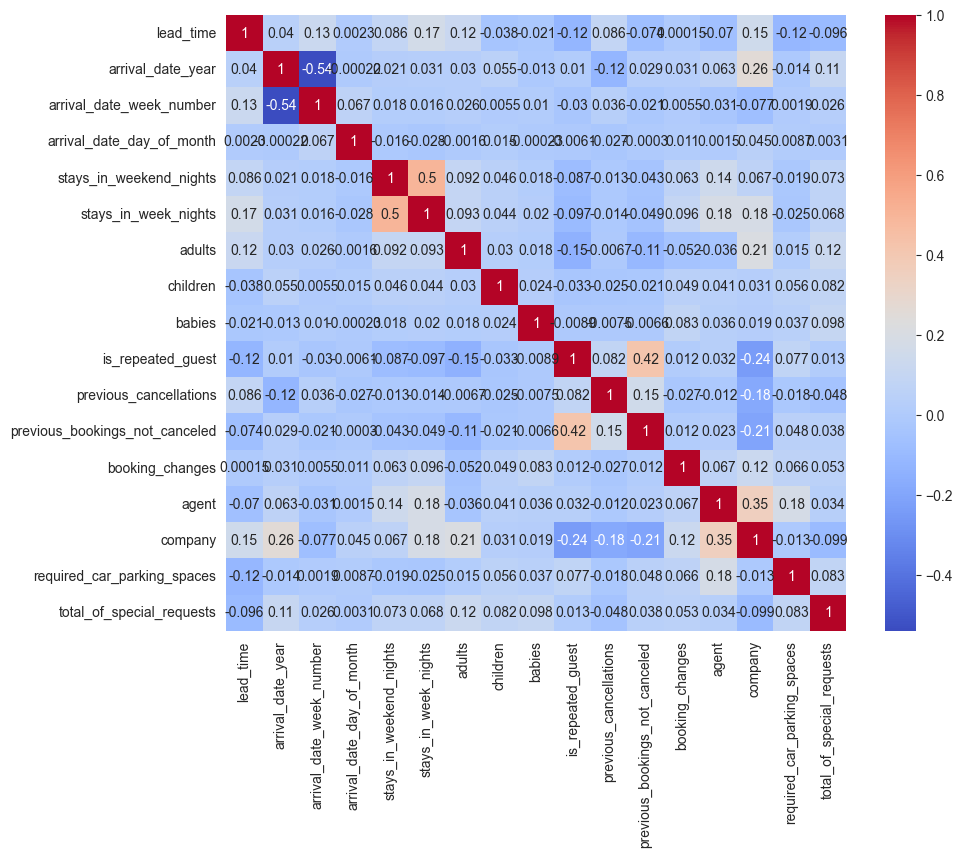

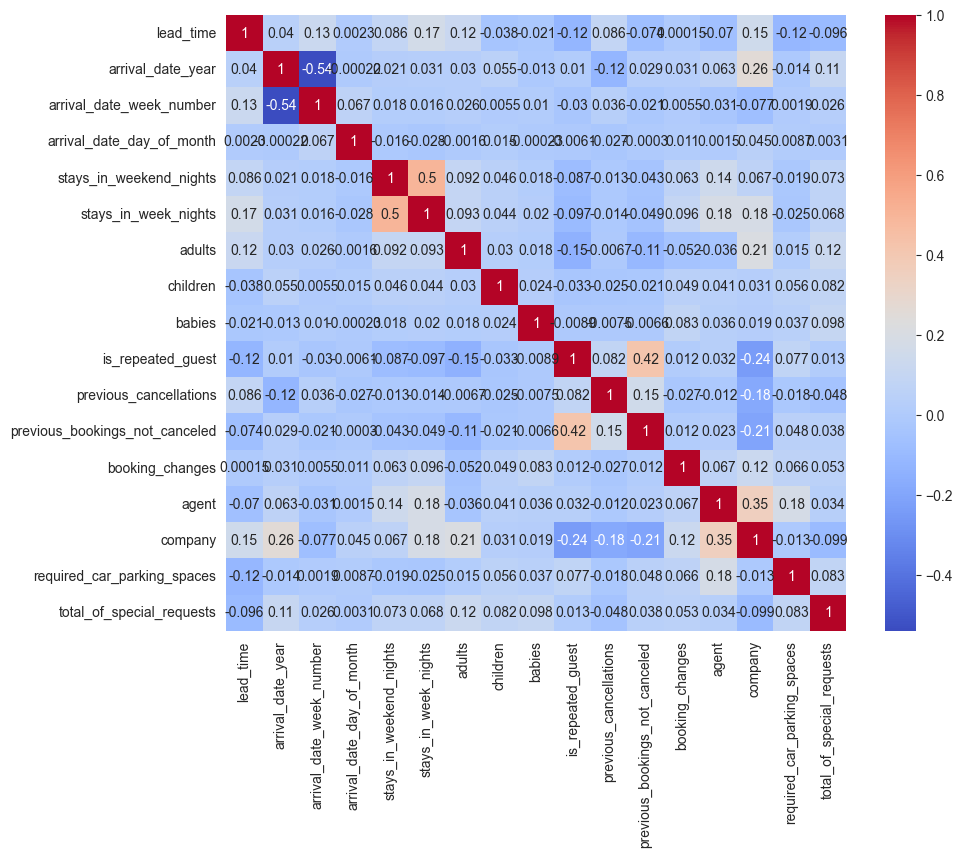

In [44]:
plot_correlation_intensity(df)

In [45]:
### MANUALLY GRADED TASK
def plot_lead_time_boxplot(df):
    """
    Create a boxplot showing how lead time differs between canceled and non-canceled bookings.
    """

    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(data=df, x="is_canceled", y="lead_time", ax=ax)
    return fig

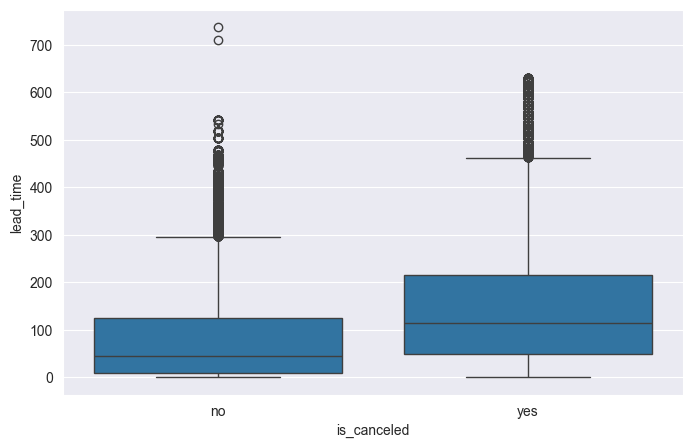

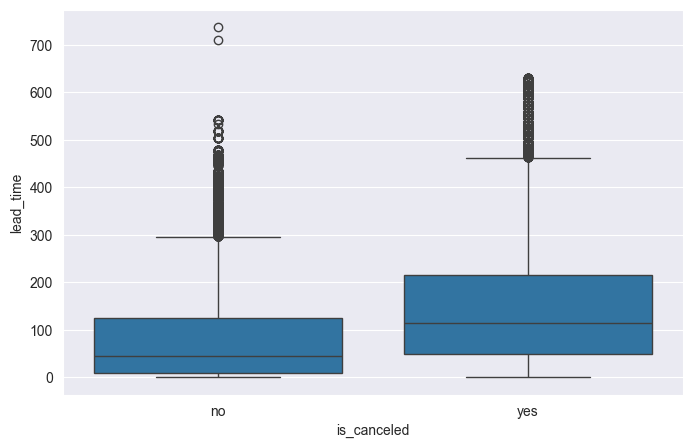

In [46]:
plot_lead_time_boxplot(df)

In [47]:
### MANUALLY GRADED TASK
def plot_cancellation_counts(df):
    """
    Create a bar plot showing how many bookings were canceled vs not canceled.
    """

    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(data=df, x="is_canceled", ax=ax)
    return fig


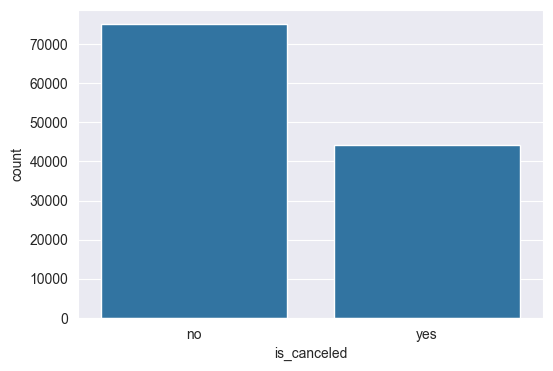

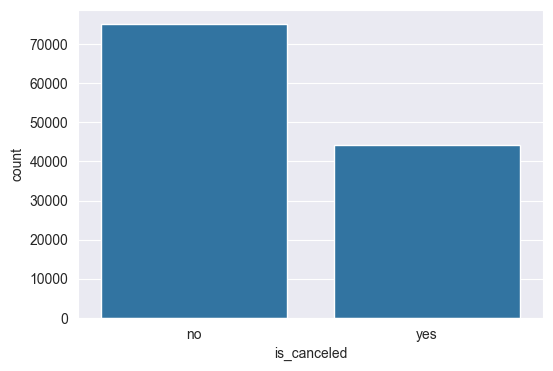

In [48]:
plot_cancellation_counts(df)

In [49]:
### AUTOMATICALLY GRADED TASK
def impute_children_mode(df):
    """
    Fill missing values in `children` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df["children"] = df["children"].fillna(df["children"].mode()[0])
    return df

In [50]:
impute_children_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [51]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_children_mode(_df)
assert hash_data_frame(_df) == "2f1c5dfe0828d78ea1a8f9c5976821a9a3eaca07cfe98326304d5972c11b361b"

In [52]:
### AUTOMATICALLY GRADED TASK
def impute_country_mode(df):
    """
    Fill missing values in `country` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df["country"] = df["country"].fillna(df["country"].mode()[0])
    return df

In [53]:
impute_country_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [54]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_country_mode(_df)
assert hash_data_frame(_df) == "528991530f1e5408a3bcbcf681a1c62189e516366e6a767ce163320e705487e5"

In [55]:
### MANUALLY GRADED TASK
def impute_agent_company_knn(df):
    """
    Impute missing values in `agent` and `company` using KNNImputer with the appropriate columns.
    
    Note: The imputed values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    imputer = KNNImputer()
    df[["agent", "company"]] = imputer.fit_transform(df[["agent", "company"]]).astype(int)
    return df


In [56]:
impute_agent_company_knn(df)

KeyboardInterrupt: 

In [57]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_hotel(df):
    """
    Encode the `hotel` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    return df.drop(columns=["hotel"])


In [58]:
encode_or_drop_hotel(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,no,342,2015,July,27,1,0,0,2,0.0,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,no,737,2015,July,27,1,0,0,2,0.0,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,no,7,2015,July,27,1,0,1,1,0.0,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,no,13,2015,July,27,1,0,1,1,0.0,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,no,14,2015,July,27,1,0,2,2,0.0,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,no,23,2017,August,35,30,2,5,2,0.0,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,no,102,2017,August,35,31,2,5,3,0.0,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,no,34,2017,August,35,31,2,5,2,0.0,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,no,109,2017,August,35,31,2,5,2,0.0,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [59]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_hotel(_df)
assert hash_data_frame(_df) == "ddfef26391e08ec0e788486481c885ebeecda826fa125e665e4eeea6096b91c9"

In [60]:
### AUTOMATICALLY GRADED TASK
def encode_is_canceled(df):
    """
    Encode the `is_canceled` column manually:
    - "no"  -> 0
    - "yes" -> 1
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    df["is_canceled"] = df["is_canceled"].map({"no": 0, "yes": 1})

    return df

In [61]:
encode_is_canceled(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [62]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_is_canceled(_df)
assert hash_data_frame(_df) == "bd5c6cf86d2ef9dc64162cb8d9d8be54b1247e6a0da08074085d6c4bf86b71df"

In [63]:
### AUTOMATICALLY GRADED TASK
def encode_arrival_date_month(df):
    """
    Encode the `arrival_date_month` column using OrdinalEncoder
    with fixed calendar order (January → December).

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    order = [["January","February","March","April","May","June","July","August","September","October","November","December"]]
    enc = OrdinalEncoder(categories=order)
    df["arrival_date_month"] = enc.fit_transform(df[["arrival_date_month"]]).astype(int)
    return df


In [64]:
encode_arrival_date_month(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [65]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_arrival_date_month(_df)
assert hash_data_frame(_df) == "5def409216f31ceb05b96377d444141c7e28cfca808a8481484ab0443a873c99"

In [66]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_meal(df):
    """
    Encode the `meal` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    enc = OrdinalEncoder()
    df["meal"] = enc.fit_transform(df[["meal"]]).astype(int)
    return df

In [67]:
encode_or_drop_meal(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [68]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_meal(_df)
assert hash_data_frame(_df) == "1c7fbbbcd1b083a264a946bce4188949dd3d27882ce357b27e5ecddee7c3c3e2"

In [69]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_country(df):
    """
    Encode the `country` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    return df.drop(columns=["country"])


In [70]:
encode_or_drop_country(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [71]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_country(_df)
print(hash_data_frame(_df))
assert hash_data_frame(_df) == "be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56"

be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56


In [72]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_customer_type(df):
    """
    Encode the `customer_type` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    enc = OrdinalEncoder()
    df["customer_type"] = enc.fit_transform(df[["customer_type"]]).astype(int)
    return df

In [73]:
encode_or_drop_customer_type(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,2,0,0
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,2,0,0
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,2,0,0
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,2,0,0
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,2,0,0
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,2,0,2
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,2,0,4
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,2,0,0


In [74]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_customer_type(_df)
assert hash_data_frame(_df) == "6c55892a0f98882ac8720b5ec0350a71cfb936ebcde9472c604ce364ce1da6a5"

In [75]:
### AUTOMATICALLY GRADED TASK
def encode_deposit_type(df):
    """
    Encode the `deposit_type` column using OrdinalEncoder
    with fixed order ['No Deposit', 'Non Refund', 'Refundable'].

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    order = [["No Deposit", "Non Refund", "Refundable"]]
    enc = OrdinalEncoder(categories=order)
    df["deposit_type"] = enc.fit_transform(df[["deposit_type"]]).astype(int)
    return df

In [76]:
encode_deposit_type(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,C,C,3,0,NaN,NaN,2,0,0
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,C,C,4,0,NaN,NaN,2,0,0
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,A,C,0,0,NaN,NaN,2,0,0
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,A,A,0,0,304.0,NaN,2,0,0
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,A,A,0,0,240.0,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,A,A,0,0,394.0,NaN,2,0,0
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,E,E,0,0,9.0,NaN,2,0,2
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,D,D,0,0,9.0,NaN,2,0,4
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,A,A,0,0,89.0,NaN,2,0,0


In [77]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_deposit_type(_df)
assert hash_data_frame(_df) == "d580508ad442d05888f34e34be95f40be99758e97d57cf98bc5085ff48df32ba"

In [78]:
### AUTOMATICALLY GRADED TASK
def combine_person_columns(df):
    """
    Create a new column 'total_persons' as the sum of 'adults', 'children', and 'babies'.
    Then drop the original three columns.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df["total_persons"] = df["adults"] + df["children"] + df["babies"]
    df = df.drop(columns=["adults", "children", "babies"])
    return df

In [79]:
combine_person_columns(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests,total_persons
0,Resort Hotel,0,342,2015,6,27,1,0,0,0,...,C,C,3,0,NaN,NaN,2,0,0,2.0
1,Resort Hotel,0,737,2015,6,27,1,0,0,0,...,C,C,4,0,NaN,NaN,2,0,0,2.0
2,Resort Hotel,0,7,2015,6,27,1,0,1,0,...,A,C,0,0,NaN,NaN,2,0,0,1.0
3,Resort Hotel,0,13,2015,6,27,1,0,1,0,...,A,A,0,0,304.0,NaN,2,0,0,1.0
4,Resort Hotel,0,14,2015,6,27,1,0,2,0,...,A,A,0,0,240.0,NaN,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,0,...,A,A,0,0,394.0,NaN,2,0,0,2.0
119386,City Hotel,0,102,2017,7,35,31,2,5,0,...,E,E,0,0,9.0,NaN,2,0,2,3.0
119387,City Hotel,0,34,2017,7,35,31,2,5,0,...,D,D,0,0,9.0,NaN,2,0,4,2.0
119388,City Hotel,0,109,2017,7,35,31,2,5,0,...,A,A,0,0,89.0,NaN,2,0,0,2.0


In [80]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = combine_person_columns(_df)
assert hash_data_frame(_df) == "f0d93e268feae1e4416b8f414b214844f2f265115d1a6a9c867586278d94b859"

In [81]:
### AUTOMATICALLY GRADED TASK
def create_room_match_column(df):
    """
    Create a new Boolean column 'room_match' that indicates whether
    the reserved room type matches the assigned room type.
    Then drop the original two columns.

    Return the updated DataFrame.
    """
    # YOUR CODE HERE
    df["room_match"] = df["reserved_room_type"] == df["assigned_room_type"]
    df = df.drop(columns=["reserved_room_type", "assigned_room_type"])
    return df


In [82]:
create_room_match_column(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests,total_persons,room_match
0,Resort Hotel,0,342,2015,6,27,1,0,0,2,...,0,3,0,NaN,NaN,2,0,0,2.0,True
1,Resort Hotel,0,737,2015,6,27,1,0,0,2,...,0,4,0,NaN,NaN,2,0,0,2.0,True
2,Resort Hotel,0,7,2015,6,27,1,0,1,1,...,0,0,0,NaN,NaN,2,0,0,1.0,False
3,Resort Hotel,0,13,2015,6,27,1,0,1,1,...,0,0,0,304.0,NaN,2,0,0,1.0,True
4,Resort Hotel,0,14,2015,6,27,1,0,2,2,...,0,0,0,240.0,NaN,2,0,1,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,7,35,30,2,5,2,...,0,0,0,394.0,NaN,2,0,0,2.0,True
119386,City Hotel,0,102,2017,7,35,31,2,5,3,...,0,0,0,9.0,NaN,2,0,2,3.0,True
119387,City Hotel,0,34,2017,7,35,31,2,5,2,...,0,0,0,9.0,NaN,2,0,4,2.0,True
119388,City Hotel,0,109,2017,7,35,31,2,5,2,...,0,0,0,89.0,NaN,2,0,0,2.0,True


In [83]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = create_room_match_column(_df)
assert hash_data_frame(_df) == "4d99349e3d7901bb36e2752e8eb34a42d9a84fc4dba6dec68f6435111985efef"

In [84]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE
    target = "is_canceled"  # ne raboti so price euro vika go nema vo csv

    X = df.drop(columns=[target])
    y = df[target]

    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    return train_X, test_X, train_y, test_y

In [85]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [86]:
_df = pd.read_csv("hotel_bookings.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "9ac702152f9fbb53b83066adf10226413d2e61a67941fa6297335ef1912e0523"
assert hash_data_frame(_test_X) == "2f646b11dd0038298d3c0e990a795266f1deb2efa996ab2eb5fa40a833167b79"
assert hash_series(_train_y) == "97d345bcc07a58c45d8353e65862fb370191c4b7e6c9dd9c99eb3423f943977f"
assert hash_series(_test_y) == "a043cd1df6fd8349f79098436bdc8ccd4df94ae494784fab62a4716044dbea53"

In [87]:
### MANUALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a suitable model.
    
    Return the trained model.
    """

    # YOUR CODE HERE
    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor(random_state=RANDOM_STATE)
    model.fit(train_X, train_y)
    return model

In [88]:
model = fit_model(train_X, train_y)

ValueError: could not convert string to float: 'City Hotel'

In [89]:
pred_y = model.predict(test_X)

NameError: name 'model' is not defined

In [ ]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    # YOUR CODE HERE
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print("MAE:", mean_absolute_error(test_y, pred_y))
    print("MSE:", mean_squared_error(test_y, pred_y))
    print("RMSE:", mean_squared_error(test_y, pred_y, squared=False))
    print("R²:", r2_score(test_y, pred_y))

In [ ]:
evaluate_model(test_y, pred_y)